In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [4]:
fashion_train.shape

(60000, 785)

In [5]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

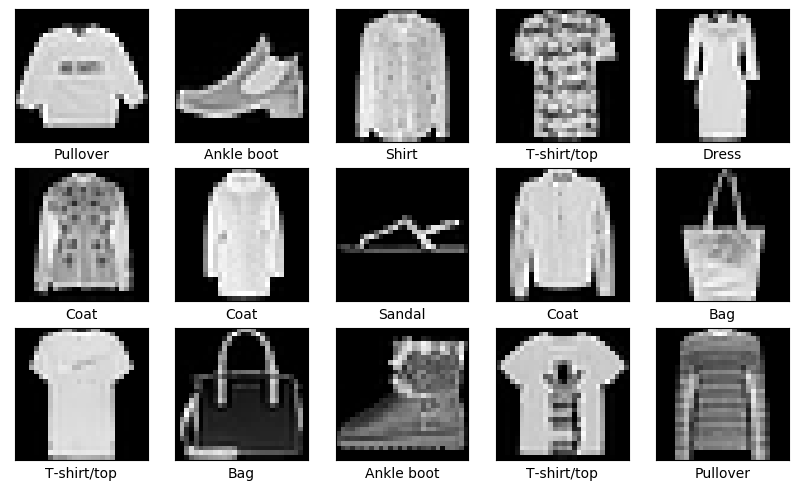

In [6]:
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)


col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [7]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [8]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 [==============================] - 38s 17ms/step - loss: 1.1117 - accuracy: 0.6267 - val_loss: 0.5374 - val_accuracy: 0.8159
Epoch 2/30
600/600 [==============================] - 9s 15ms/step - loss: 0.7359 - accuracy: 0.7494 - val_loss: 0.4640 - val_accuracy: 0.8429
Epoch 3/30
600/600 [==============================] - 9s 16ms/step - loss: 0.6581 - accuracy: 0.7778 - val_loss: 0.4492 - val_accuracy: 0.8417
Epoch 4/30
600/600 [==============================] - 11s 19ms/step - loss: 0.6339 - accuracy: 0.7884 - val_loss: 0.4730 - val_accuracy: 0.8380
Epoch 5/30
600/600 [==============================] - 9s 15ms/step - loss: 0.6085 - accuracy: 0.7972 - val_loss: 0.4617 - val_accuracy: 0.8547
Epoch 6/30
600/600 [==============================] - 9s 15ms/step - loss: 0.5943 - accuracy: 0.8040 - val_loss: 0.4758 - val_accuracy: 0.8490
Epoch 7/30
600/600 [==============================] - 9s 15ms/step - loss: 0.5783 - accuracy: 0.8079 - val_loss: 0.4557 - val_accuracy: 0.85

In [9]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 3s 6ms/step - loss: 0.3821 - accuracy: 0.8741


In [10]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8741


In [11]:
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 2s 5ms/step


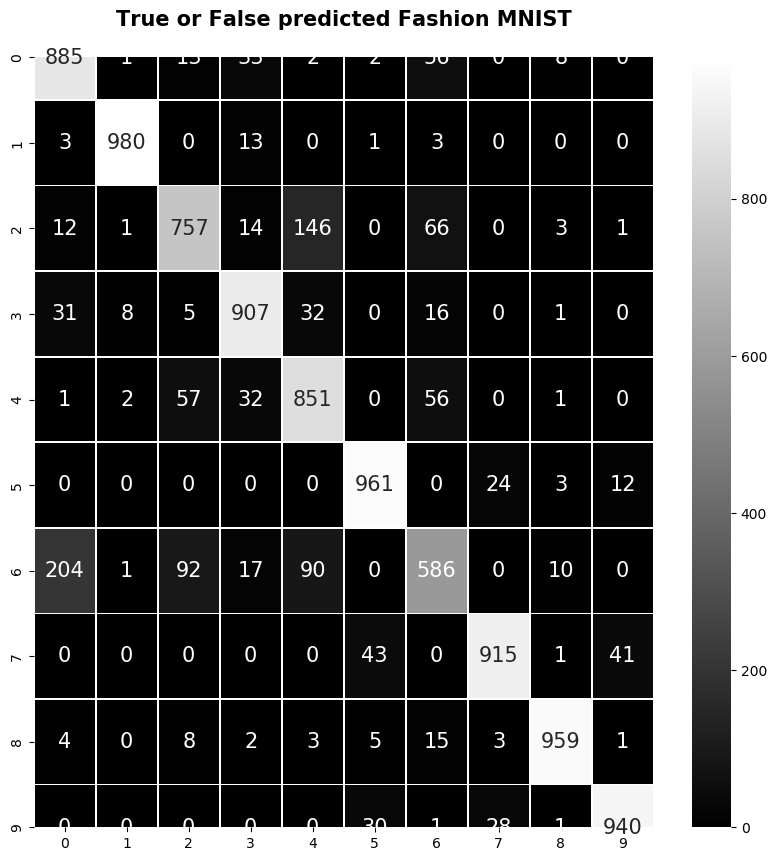

In [12]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.76      0.78      1000
           3       0.89      0.91      0.90      1000
           4       0.76      0.85      0.80      1000
           5       0.92      0.96      0.94      1000
           6       0.73      0.59      0.65      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [14]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


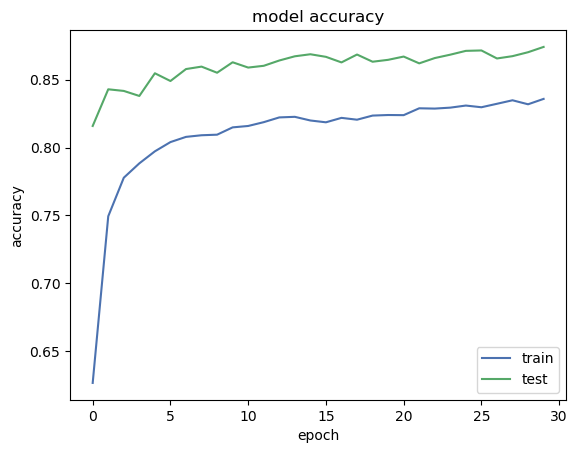

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

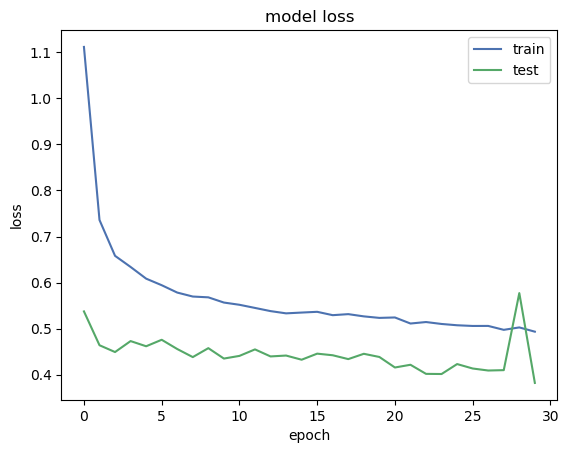

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [17]:
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) 
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 109ms/step


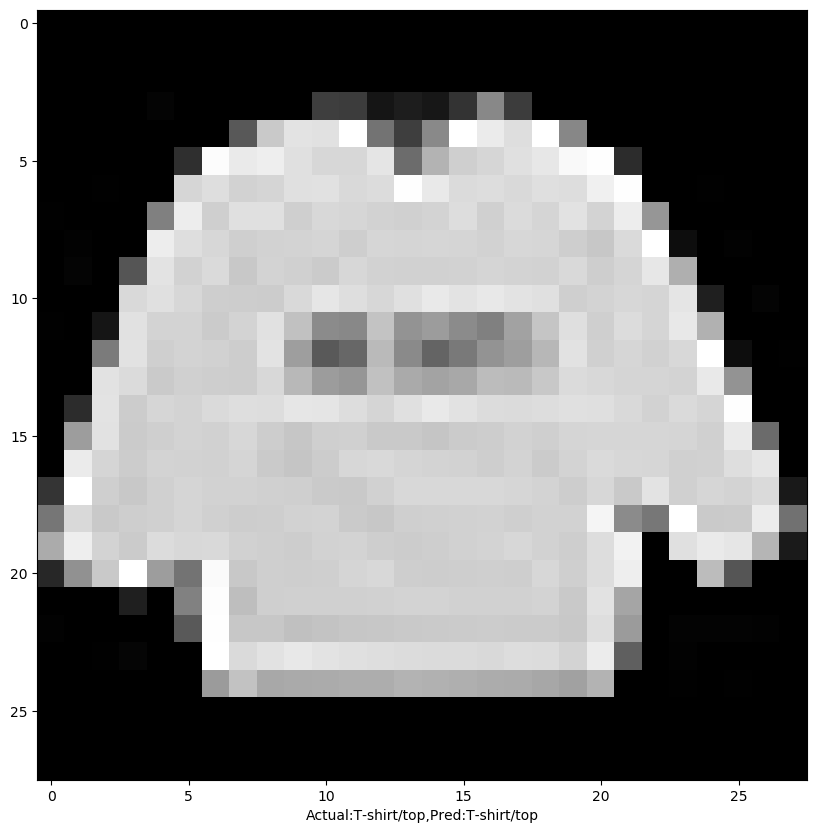

In [18]:
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()